In [1]:
# ── Imports ───────────────────────────────────────────────────
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from src.preprocessing import load_data

# ── Load data ─────────────────────────────────────────────────
params, series = load_data()

print(params)
print(series.head())

Parameters : MAR(1,1) | φ=0.617062379728722, ψ=0.777070127450962, df=1.4947, σ=402.94
Series     : 476 obs [1980-02 → 2019-09]
MARParams(phi=0.617062379728722, psi=0.777070127450962, df=1.49474196142594, scale=402.939552934085, r=1, s=1)
                 cycle         u_t
Date                              
1980-02-01  691.177365  264.677815
1980-03-01  493.125609  188.836347
1980-04-01   39.664662   15.189091
1980-05-01 -145.816544  -55.838640
1980-06-01  195.270617   74.776465


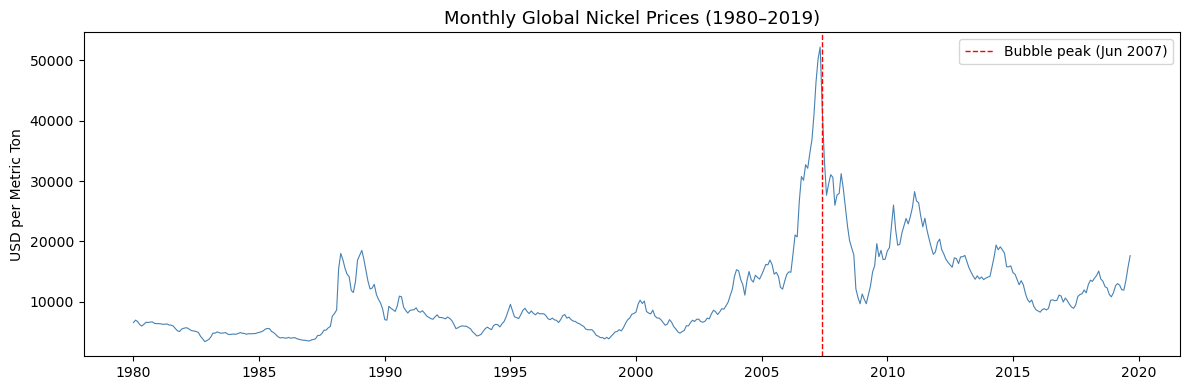

In [ ]:
# ── Plot 1: Raw Nickel prices ─────────────────────────────────
raw = pd.read_csv('../data/raw/nickel_prices_1980_2019.csv')
raw['Date'] = pd.to_datetime(raw['Date'].str.replace('M', '-'), format='%Y-%m')
raw = raw.set_index('Date')

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(raw.index, raw['Nickel_Price_USD_per_MT'], 
        color='steelblue', linewidth=0.8)
ax.set_title('Monthly Global Nickel Prices (1980–2019)', fontsize=13)
ax.set_ylabel('USD per Metric Ton')
ax.set_xlabel('')
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(pd.Timestamp('2007-05-01'), color='red', 
           linestyle='--', linewidth=1, label='Bubble peak (May 2007)')
ax.legend()
plt.tight_layout()
plt.savefig('../outputs/figures/01_raw_nickel_prices.png', dpi=150)
plt.show()